Q1] How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Ans : Total multiplications = n*k*m
Because each row of one matrix will multiply with each column of other matrix.
So, (n,k) matrix's first row having 'k' elements will be multiplied with each column of (k,m) matrix giving us k*m multiplications and then other rows of matrix (n,k) will be multiplied giving us n*k*m multiplications.

Total additions = n*m
Number of additions will be equal to number of elements in the newly formed matrix after multiplication of (n,k) and (k,m) matrix i.e., (n,m) matrix.

Q2] Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [1]:
from time import time
import random

# using list of lists
def matrix_mul(A,B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])
    
    # initialize result matrix with zeros
    C = [[0 for _ in range(m)] for _ in range(n)]
    
    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i][j] += A[i][l] * B[l][j]
    
    return C

A = [[random.randint(0,1000) for _ in range(600)] for _ in range(500)]
B = [[random.randint(0,1000) for _ in range(400)] for _ in range(600)]

start_time = time()
C = matrix_mul(A,B)
end_time = time()
list_time = end_time - start_time
# print(C)

# using numpy
import numpy as np

A = [[random.randint(0,1000) for _ in range(600)] for _ in range(500)]
B = [[random.randint(0,1000) for _ in range(400)] for _ in range(600)]

start_time = time()
C = np.matmul(A,B)
end_time = time()
np_time = end_time - start_time
# print(C)

print(f"Using list of lists time --> {list_time} secs")
print(f"Using numpy time --> {np_time} secs")

Using list of lists time --> 43.31143307685852 secs
Using numpy time --> 0.23312830924987793 secs


Ans : As you can see the time for the list of lists method is more than numpy method. 
"Multiplication using Numpy also know as vectorization which main aim to reduce or remove the explicit use of for loops in the program by which computation becomes faster." - source - geeksforgeeks 

Q3] Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [2]:
import random
from time import time

a = [random.randint(0,1000) for _ in range(5000)]

def find_median(a):
    m = len(a)
    num_to_remove = m // 2 -1 # Number of highest elements to remove for median

    for _ in range(num_to_remove):
        n = -1
        for i in range(len(a)):
            if a[i]>n:
                n = a[i]
        a.remove(n)  # Remove the highest element

    if m % 2 == 1:
        # For odd-length array, the median is the next highest element
        n = -1
        for i in range(len(a)):
            if a[i]>n:
                n = a[i]
        a.remove(n)  # Remove the highest element
        
        n = -1
        for i in range(len(a)):
            if a[i]>n:
                n = a[i]
        return n
    else:
        # For even-length array, we need to find the average of the next two highest elements
        n = -1
        for i in range(len(a)):
            if a[i]>n:
                n = a[i]
        highest = n
        a.remove(highest)
        
        n = -1
        for i in range(len(a)):
            if a[i]>n:
                n = a[i]
        second_highest = n
        return (highest + second_highest) / 2

start_t = time()
median = find_median(a.copy())
print(median)
end_t = time()
print(f"{end_t-start_t} secs")
# Time complexity is O(n^2)

500.5
1.255237102508545 secs


In [3]:
import random
from time import time

a = [random.randint(0,10000) for _ in range(50000)]   # increased the range to see significant difference

start_t = time()
a.sort() # time complexity O(n*log(n))
if len(a)%2 == 0:
    b = a[int(len(a)/2)]
    c = a[int(len(a)/2) - 1]
    med = (c + b)/2 # avg of two middle elements
    print(med)
else:
    med = a[int((len(a) - 1)/2)] # mid element will be median
    print(med)
end_t = time()
print(f"{end_t-start_t} secs")

4988.5
0.015685558319091797 secs


In [4]:
import numpy as np
import random
from time import time

a = [random.randint(0,10000) for _ in range(50000)]  # increased the range to see significant difference

start_t = time()
ans = np.median(a)
print(ans)
end_t = time()
print(f"{end_t-start_t} secs")

5002.0
0.006447315216064453 secs


Ans : As we can see that, the numpy.median() method takes the least time and is efficient compared to both the methods.

Q4] What is the gradient of the following function with respect to x and y?

x^2 * y + y^3 * sin(x)

Ans : Gradient --> (2xy + y^3*cos(x) , x^2 + 3y^2*sin(x))

Q5] Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [5]:
import jax.numpy as jnp
from jax import grad

# Define the function f(x, y)
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Compute the gradient using JAX
grad_f = grad(f, argnums=(0, 1)) # argnums specifies which arguments of the function f you want to differentiate with respect to

# Define a few random values of x and y
values = [(1.0, -1.0), (2.0, 0.0), (0.0, 5.0)]

# Evaluate the gradient at these values
jax_gradients = [grad_f(x, y) for x, y in values]

# Manually compute the gradient (analytical solution) for comparison
analytical_gradients = [(2 * x * y + y**3 * jnp.cos(x), x**2 + 3 * y**2 * jnp.sin(x)) for x, y in values]

# Print the results
for (x, y), jax_grad, analytical_grad in zip(values, jax_gradients, analytical_gradients):
    print(f"For (x, y) = ({x}, {y}):")
    print(f" JAX Gradient: {jax_grad}")
    print(f" Analytical Gradient: {analytical_grad}\n")

For (x, y) = (1.0, -1.0):
 JAX Gradient: (Array(-2.5403023, dtype=float32, weak_type=True), Array(3.5244129, dtype=float32, weak_type=True))
 Analytical Gradient: (Array(-2.5403023, dtype=float32, weak_type=True), Array(3.5244129, dtype=float32, weak_type=True))

For (x, y) = (2.0, 0.0):
 JAX Gradient: (Array(0., dtype=float32, weak_type=True), Array(4., dtype=float32, weak_type=True))
 Analytical Gradient: (Array(0., dtype=float32, weak_type=True), Array(4., dtype=float32, weak_type=True))

For (x, y) = (0.0, 5.0):
 JAX Gradient: (Array(125., dtype=float32, weak_type=True), Array(0., dtype=float32, weak_type=True))
 Analytical Gradient: (Array(125., dtype=float32, weak_type=True), Array(0., dtype=float32, weak_type=True))



Q6] Use sympy to confirm that you obtain the same gradient analytically.

In [6]:
import sympy as sp

# Define the symbolic variables x and y
x, y = sp.symbols('x y')

# Define the function f(x, y)
f = x**2 * y + y**3 * sp.sin(x)

# Compute the partial derivatives (gradient)
df_dx = sp.diff(f, x)  # Partial derivative with respect to x
df_dy = sp.diff(f, y)  # Partial derivative with respect to y

# Display the results
print(f"Gradient --> {df_dx, df_dy}")

Gradient --> (2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x))


Q7] Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

2022
    Branch 1
        Roll Number: 1, Name: N, Marks:
        Maths: 100, English: 70 …
    Branch 2
2023
    Branch 1
    Branch 2
2024
    Branch 1
    Branch 2
2025
    Branch 1
    Branch 2

In [7]:
student_records = {
    2022 : {
        "Branch 1" : {
            1 : {"Name" : "Soham", "Marks" : {
                "Maths" : 100, 
                "English" : 85
            }}
        },
        "Branch 2" : {
            2 : {"Name" : "Prasad", "Marks" : {
                "Maths" : 90, 
                "English" : 50
            }}
        }
    },
    2023 : {
        "Branch 1" : {
            3 : {"Name" : "Soham 2", "Marks" : {
                "Maths" : 10, 
                "English" : 50
            }}
        },
        "Branch 2" : {
            4 : {"Name" : "Prasad 2", "Marks" : {
                "Maths" : 9, 
                "English" : 60
            }}
        }
    },
    2024 : {
        "Branch 1" : {
            5 : {"Name" : "Soham 3", "Marks" : {
                "Maths" : 95, 
                "English" : 45
            }}
        },
        "Branch 2" : {
            6 : {"Name" : "Prasad 3", "Marks" : {
                "Maths" : 94, 
                "English" : 70
            }}
        }
    },
    2025 : {
        "Branch 1" : {
            7 : {"Name" : "Soham 4", "Marks" : {
                "Maths" : 20, 
                "English" : 87
            }}
        },
        "Branch 2" : {
            8 : {"Name" : "Prasad 4", "Marks" : {
                "Maths" : 79, 
                "English" : 61
            }}
        }
    }
}

print(student_records[2025]["Branch 1"][7]["Name"])

Soham 4


Q8] Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [8]:
class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)

    def __repr__(self):
        return f"Database: {self.years}"

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year: {self.year}, Branches: {self.branches}"
    
class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch: {self.name}, Students: {self.students}"

class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

    def __repr__(self):
        return f"Roll Number: {self.roll_number}, Name: {self.name}, Marks: {self.marks}"

# Create the database
db = Database()

# Add data for 2022
year_2022 = Year(2022)
branch_1_2022 = Branch("Branch 1")
branch_1_2022.add_student(Student(1, "Soham", {"Maths": 100, "English": 85}))
year_2022.add_branch(branch_1_2022)

branch_2_2022 = Branch("Branch 2")
branch_2_2022.add_student(Student(2, "Prasad", {"Maths": 90, "English": 50}))
year_2022.add_branch(branch_2_2022)

db.add_year(year_2022)

# Add data for 2023
year_2023 = Year(2023)
branch_1_2023 = Branch("Branch 1")
branch_1_2023.add_student(Student(3, "Soham 2", {"Maths": 10, "English": 50}))
year_2023.add_branch(branch_1_2023)

branch_2_2023 = Branch("Branch 2")
branch_2_2023.add_student(Student(4, "Prasad 2", {"Maths": 9, "English": 60}))
year_2023.add_branch(branch_2_2023)

db.add_year(year_2023)

# Add data for 2024
year_2024 = Year(2024)
branch_1_2024 = Branch("Branch 1")
branch_1_2024.add_student(Student(5, "Soham 3", {"Maths": 95, "English": 45}))
year_2024.add_branch(branch_1_2024)

branch_2_2024 = Branch("Branch 2")
branch_2_2024.add_student(Student(6, "Prasad 3", {"Maths": 94, "English": 70}))
year_2024.add_branch(branch_2_2024)

db.add_year(year_2024)

# Add data for 2025
year_2025 = Year(2025)
branch_1_2025 = Branch("Branch 1")
branch_1_2025.add_student(Student(7, "Soham 4", {"Maths": 20, "English": 87}))
year_2025.add_branch(branch_1_2025)

branch_2_2025 = Branch("Branch 2")
branch_2_2025.add_student(Student(8, "Prasad 4", {"Maths": 79, "English": 61}))
year_2025.add_branch(branch_2_2025)

db.add_year(year_2025)

# print(db)
print(year_2025.branches[0].students[0])

Roll Number: 7, Name: Soham 4, Marks: {'Maths': 20, 'English': 87}


Q9] Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

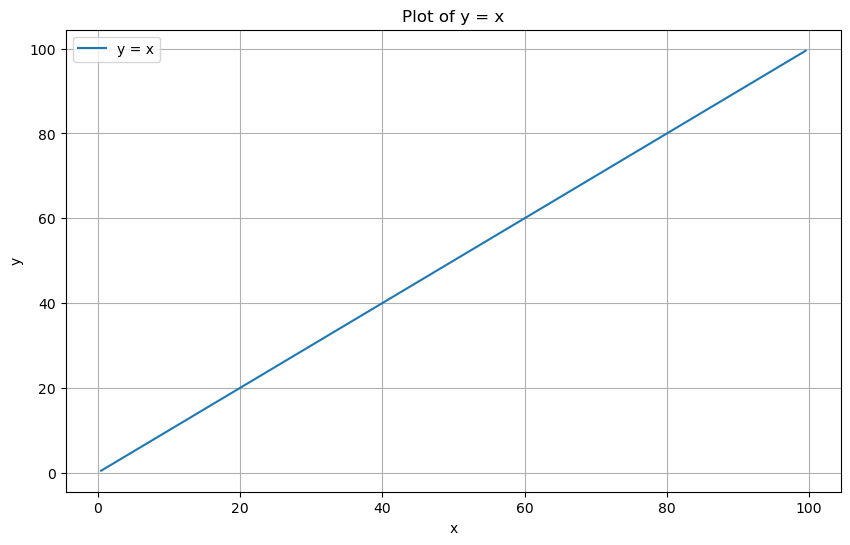

In [9]:
# 1] y = x
import matplotlib.pyplot as plt
import numpy as np

# Define the domain for x
x = np.arange(0.5, 100, 0.5)

# Define the function y = x
y = x

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="y = x")

# Add labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y = x")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

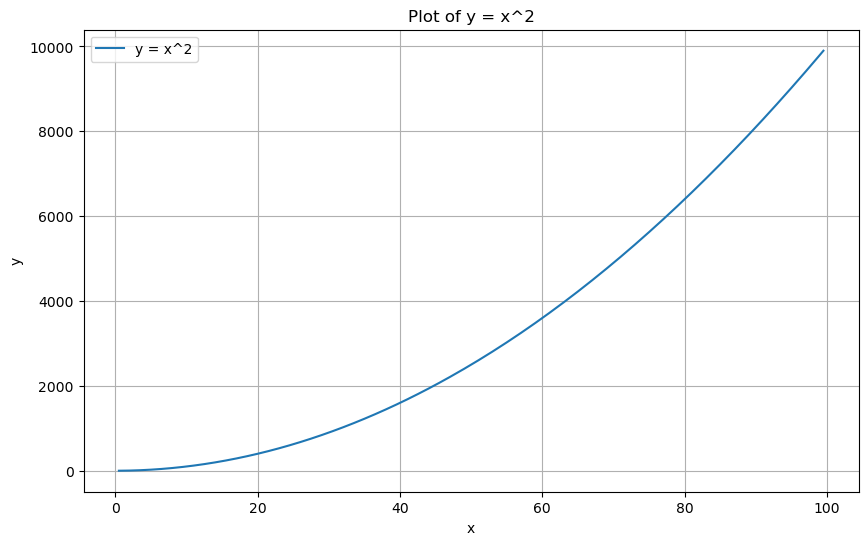

In [10]:
# 2] y = x^2
import matplotlib.pyplot as plt
import numpy as np

# Define the domain for x
x = np.arange(0.5, 100, 0.5)

# Define the function y = x
y = x**2

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="y = x^2")

# Add labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y = x^2")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

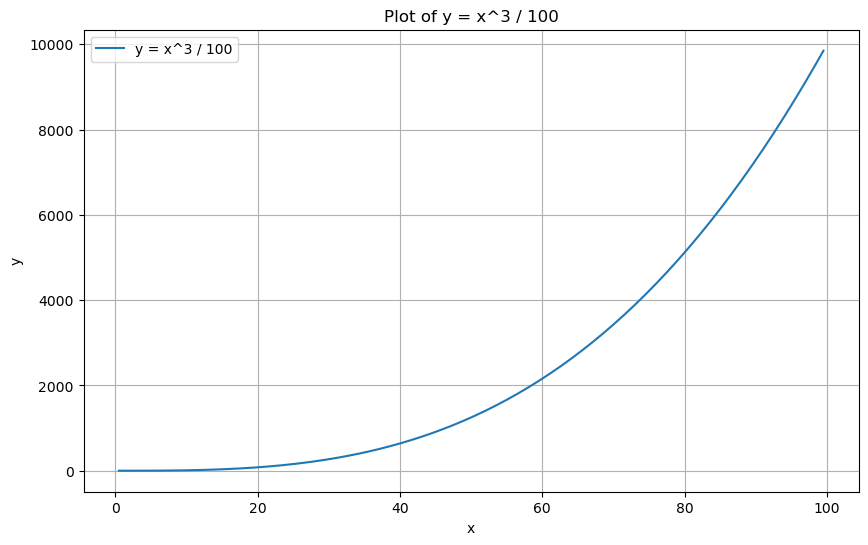

In [11]:
# 3] y = x^3 / 100
import matplotlib.pyplot as plt
import numpy as np

# Define the domain for x
x = np.arange(0.5, 100, 0.5)

# Define the function y = x
y = (x**3) / 100

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="y = x^3 / 100")


# Add labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y = x^3 / 100")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

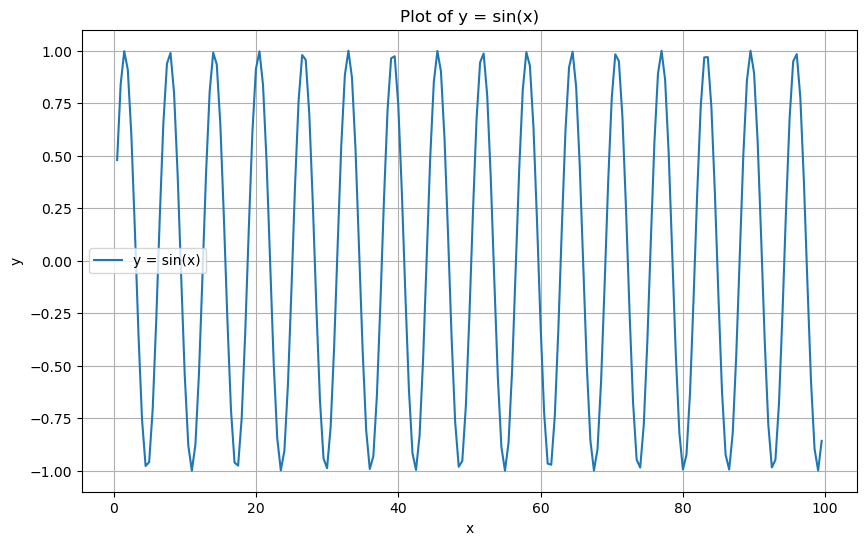

In [12]:
# 4] y = sin(x)
import matplotlib.pyplot as plt
import numpy as np

# Define the domain for x
x = np.arange(0.5, 100, 0.5)

# Define the function y = x
y = np.sin(x)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="y = sin(x)")


# Add labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y = sin(x)")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

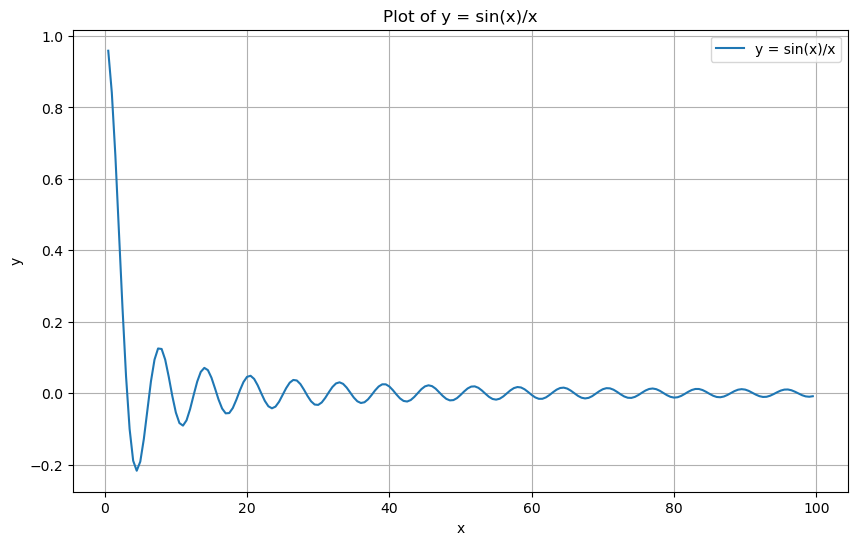

In [13]:
# 5] y = sin(x)/x
import matplotlib.pyplot as plt
import numpy as np

# Define the domain for x
x = np.arange(0.5, 100, 0.5)

# Define the function y = x
y = np.sin(x) / x

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="y = sin(x)/x")


# Add labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y = sin(x)/x")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

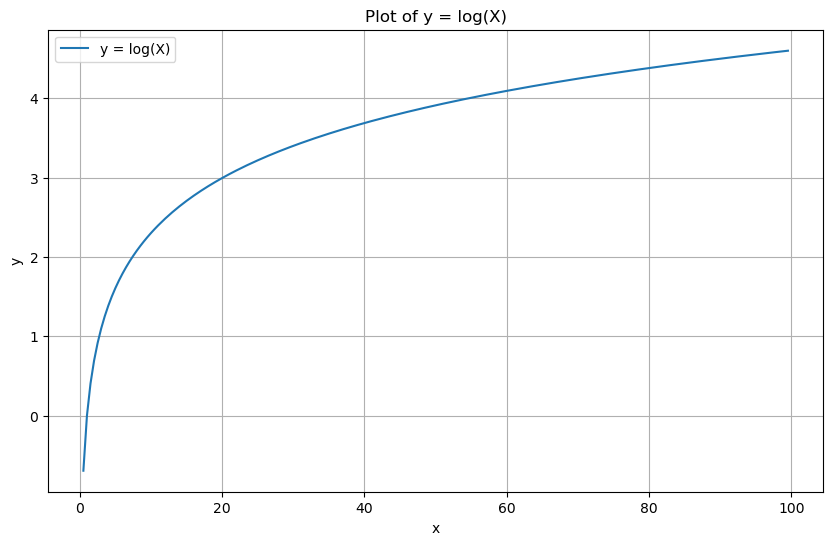

In [14]:
# 6] y = log(X)
import matplotlib.pyplot as plt
import numpy as np

# Define the domain for x
x = np.arange(0.5, 100, 0.5)

# Define the function y = x
y = np.log(x)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="y = log(X)")


# Add labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y = log(X)")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

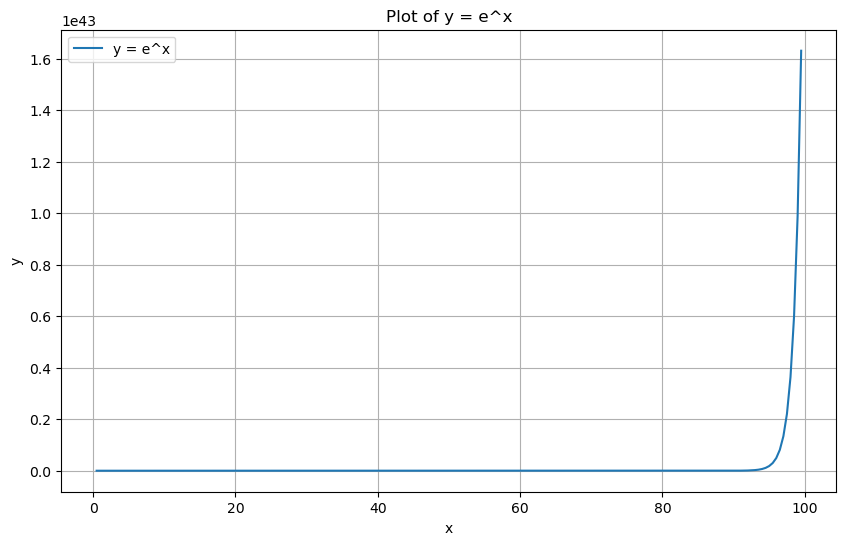

In [15]:
# 7] y = e^x
import matplotlib.pyplot as plt
import numpy as np

# Define the domain for x
x = np.arange(0.5, 100, 0.5)

# Define the function y = x
y = np.exp(x)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="y = e^x")


# Add labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y = e^x")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

Q10] Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [16]:
import pandas as pd
x = np.random.uniform(1,2,size=(20,5))
print(f"{x}\n")
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd', 'e'])
print(df)
print(f"{df.std()}\n")
print(f"Column with highest STD : {df.std().idxmax()}")

[[1.08640338 1.76511089 1.54237533 1.54831003 1.01922611]
 [1.34071852 1.2102044  1.74582564 1.21901396 1.27365955]
 [1.64925221 1.52535016 1.71591897 1.61487698 1.80722171]
 [1.95021045 1.94011984 1.04853501 1.02452359 1.38117567]
 [1.37319637 1.23240801 1.00737611 1.08780022 1.19689044]
 [1.33913621 1.8864028  1.25507453 1.86474541 1.11416126]
 [1.85721393 1.68157011 1.1963117  1.29710899 1.65571059]
 [1.1011111  1.5915551  1.66560511 1.11154053 1.18799842]
 [1.84361928 1.29913638 1.56432889 1.11583221 1.85385352]
 [1.42856514 1.59058436 1.67944293 1.33576015 1.86371896]
 [1.60562228 1.99963017 1.5116046  1.87540433 1.46411833]
 [1.30774246 1.68721424 1.15187519 1.28276562 1.54087229]
 [1.15404264 1.04341728 1.90429874 1.15245635 1.84588964]
 [1.28870436 1.41920989 1.62941946 1.63579197 1.21153842]
 [1.9179878  1.92826292 1.3462269  1.92252002 1.16285649]
 [1.42114227 1.39331635 1.93149257 1.9892052  1.38885287]
 [1.95700079 1.19739642 1.94115247 1.09538487 1.05500993]
 [1.21839879 1

In [17]:
row_mean = df.mean(axis=1)
print(f"{row_mean}\n")
print(f"Row with lowest mean : {row_mean.idxmin()}")

0     1.392285
1     1.357884
2     1.662524
3     1.468913
4     1.179534
5     1.491904
6     1.537583
7     1.331562
8     1.535354
9     1.579614
10    1.691276
11    1.394094
12    1.420021
13    1.436933
14    1.655571
15    1.624802
16    1.449189
17    1.222994
18    1.541001
19    1.762628
dtype: float64

Row with lowest mean : 4


Q11] Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [18]:
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
print(df)

           a         b         c         d         e         f
0   1.086403  1.765111  1.542375  1.548310  1.019226  6.961426
1   1.340719  1.210204  1.745826  1.219014  1.273660  6.789422
2   1.649252  1.525350  1.715919  1.614877  1.807222  8.312620
3   1.950210  1.940120  1.048535  1.024524  1.381176  7.344565
4   1.373196  1.232408  1.007376  1.087800  1.196890  5.897671
5   1.339136  1.886403  1.255075  1.864745  1.114161  7.459520
6   1.857214  1.681570  1.196312  1.297109  1.655711  7.687915
7   1.101111  1.591555  1.665605  1.111541  1.187998  6.657810
8   1.843619  1.299136  1.564329  1.115832  1.853854  7.676770
9   1.428565  1.590584  1.679443  1.335760  1.863719  7.898072
10  1.605622  1.999630  1.511605  1.875404  1.464118  8.456380
11  1.307742  1.687214  1.151875  1.282766  1.540872  6.970470
12  1.154043  1.043417  1.904299  1.152456  1.845890  7.100105
13  1.288704  1.419210  1.629419  1.635792  1.211538  7.184664
14  1.917988  1.928263  1.346227  1.922520  1.162856  8

In [19]:
df['g'] = np.where(df['f']<8, 'LT8', 'GT8')
print(df)

           a         b         c         d         e         f    g
0   1.086403  1.765111  1.542375  1.548310  1.019226  6.961426  LT8
1   1.340719  1.210204  1.745826  1.219014  1.273660  6.789422  LT8
2   1.649252  1.525350  1.715919  1.614877  1.807222  8.312620  GT8
3   1.950210  1.940120  1.048535  1.024524  1.381176  7.344565  LT8
4   1.373196  1.232408  1.007376  1.087800  1.196890  5.897671  LT8
5   1.339136  1.886403  1.255075  1.864745  1.114161  7.459520  LT8
6   1.857214  1.681570  1.196312  1.297109  1.655711  7.687915  LT8
7   1.101111  1.591555  1.665605  1.111541  1.187998  6.657810  LT8
8   1.843619  1.299136  1.564329  1.115832  1.853854  7.676770  LT8
9   1.428565  1.590584  1.679443  1.335760  1.863719  7.898072  LT8
10  1.605622  1.999630  1.511605  1.875404  1.464118  8.456380  GT8
11  1.307742  1.687214  1.151875  1.282766  1.540872  6.970470  LT8
12  1.154043  1.043417  1.904299  1.152456  1.845890  7.100105  LT8
13  1.288704  1.419210  1.629419  1.635792  1.21

In [20]:
print(f"Number of rows in df where value in 'g' column is 'LT8' : {(df['g']=='LT8').sum()}")

Number of rows in df where value in 'g' column is 'LT8' : 15


In [21]:
std_lt8 = df[df['g']=='LT8']['f'].std()
print(f"STD of column 'f' where value in 'g' column is 'LT8' : {std_lt8}")

std_gt8 = df[df['g']=='GT8']['f'].std()
print(f"STD of column 'f' where value in 'g' column is 'GT8' : {std_gt8}")

STD of column 'f' where value in 'g' column is 'LT8' : 0.5757058131708868
STD of column 'f' where value in 'g' column is 'GT8' : 0.26102496965857025


Q12] Write a small piece of code to explain broadcasting in numpy.

In [22]:
# "The term broadcasting refers to the ability of NumPy to treat arrays with different dimensions during arithmetic operations."
# "This process involves certain rules that allow the smaller array to be ‘broadcast’ across the larger one, ensuring that they 
#  have compatible shapes for these operations."
#  -- source - "https://www.geeksforgeeks.org/numpy-array-broadcasting/"

a = np.array([[1,2,3,4],[5,6,7,8]])
b = np.array([1,1,2,2])

print(a+b)

# In the above example, Numpy broadcasts the smaller array 'b' across 'a' for the addition operation 
# to be performed element-wise

[[ 2  3  5  6]
 [ 6  7  9 10]]


Q13] Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [23]:
a = np.array([10,9,8,7,6,5,11])

def argmin(a):
    n = 100000
    for i in range(len(a)):
        if a[i] < n:
            n = a[i]
            idx = i
    return idx
# print(np.argmin(a))
# print(argmin(a))
if np.argmin(a) == argmin(a):
    print("The program for argmin is correct!")

The program for argmin is correct!
